In [1]:
%pip install matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("D:\Visual Studio\FIAP - Pastas\PythonFIAP\Pandas\manutencao_preditiva.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   UDI                        10000 non-null  int64  
 1   ID Produto                 10000 non-null  object 
 2   Tipo                       10000 non-null  object 
 3   Temperatura Ar [K]         10000 non-null  float64
 4   Temperatura Processo [K]   10000 non-null  float64
 5   Velocidade Rotacao [rpm]   10000 non-null  int64  
 6   Torque [Nm]                10000 non-null  float64
 7   Desgaste Ferramenta [min]  10000 non-null  int64  
 8   Alvo                       10000 non-null  int64  
 9   Tipo da Falha              10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


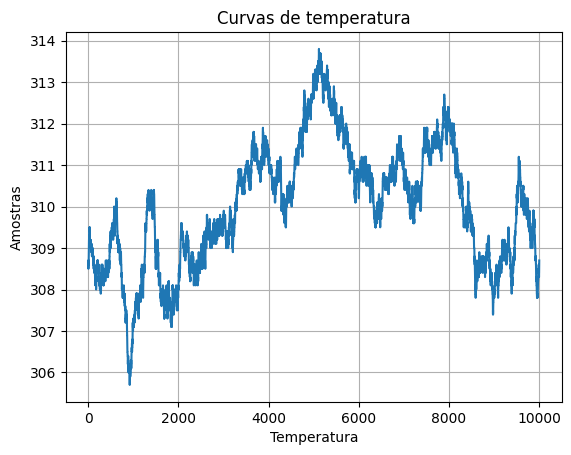

In [7]:
x = df['UDI']
y1 = df['Temperatura Ar [K]']
y2 = df['Temperatura Processo [K]']

plt.plot(x, y2)
plt.ylabel("Amostras")
plt.xlabel("Temperatura")
plt.title("Curvas de temperatura")
plt.grid()
plt.show()

In [8]:
df["Tipo"].value_counts()

Tipo
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [9]:
df_filtrado = df[df["Tipo"] == "L"]
df_filtrado

,UDI,ID Produto,Tipo,Temperatura Ar [K],Temperatura Processo [K],Velocidade Rotacao [rpm],Torque [Nm],Desgaste Ferramenta [min],Alvo,Tipo da Falha
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9988,9989,L57168,L,298.9,308.6,1771,24.1,213,0,No Failure
9990,9991,L57170,L,298.8,308.5,1527,36.2,3,0,No Failure
9992,9993,L57172,L,298.8,308.4,1484,39.2,8,0,No Failure
9993,9994,L57173,L,298.8,308.4,1401,47.3,10,0,No Failure


In [10]:
dados = {"A":[10,20,30,40,50],
         "B":[100,200,300,400,500]}

dados_novos = pd.DataFrame(dados)
print(dados_novos)
dados_novos["soma"] = dados_novos["A"] + dados_novos["B"]
dados_novos["sub"] = dados_novos["A"] - dados_novos["B"]
dados_novos["mult"] = dados_novos["A"] * dados_novos["B"]
print(dados_novos)

    A    B
0  10  100
1  20  200
2  30  300
3  40  400
4  50  500
    A    B  soma  sub   mult
0  10  100   110  -90   1000
1  20  200   220 -180   4000
2  30  300   330 -270   9000
3  40  400   440 -360  16000
4  50  500   550 -450  25000


In [24]:
df_filtrado = df[df["Tipo"] == "M"]
minimo = min(df_filtrado["Temperatura Ar [K]"])
maximo = max(df_filtrado["Temperatura Ar [K]"])
media = 0
mediana = sorted(df_filtrado["Temperatura Ar [K]"])
if (len(mediana) % 2 == 0 ):
    mediana = (mediana[len(mediana)/2] + mediana[len(mediana)/2+1])/2
else:
    mediana = mediana[int(len(mediana)/2-0.5)]
    
for i in df_filtrado["Temperatura Ar [K]"]:
    media+=i
media/= len(df_filtrado["Temperatura Ar [K]"])

print(f"Minimo: {minimo} \nMaximo: {maximo} \nMedia: {media}\nMediana: {mediana}")

Minimo: 295.3 
Maximo: 304.4 
Media: 300.02926259592965
Mediana: 300.1


In [51]:
filtro_falhas = df[df["Tipo da Falha"] != "No Failure"]
torque = filtro_falhas["Torque [Nm]"]
velo = filtro_falhas["Velocidade Rotacao [rpm]"]
mediaVelo = 0
mediaTorque = 0
for i in velo:
    mediaVelo+=i
for j in torque:
    mediaTorque+=j

mediaVelo/=len(velo)
mediaTorque/=len(torque)

print(f"Media de torque: {mediaTorque:.2f} \nMedia de velocidade: {mediaVelo:.2f}")

Media de torque: 50.04 
Media de velocidade: 1495.83


In [52]:
falhas = []

for i in df["Desgaste Ferramenta [min]"]:
    if i > 0:
        falhas.append(i)
        
len(falhas)

5333

In [58]:
desgaste = []

for j in df["Tipo da Falha"]:
    if j == "Tool Wear Failure":
        desgaste.append(j)
        
desgaste
total_de_desgaste = len(desgaste)
total_de_desgaste

45